Edad por Área del Conocimiento: Calcular la media y mediana de la edad para las 3 áreas del conocimiento con más estudiantes. Esto podría mostrar si ciertas áreas atraen a estudiantes de mayor o menor edad (ej. ¿Tecnología atrae a gente más joven que Educación?).

In [8]:
# Cargar datos e importar librerias
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../data/matriculas_ed_superior_nuble_2021.csv');

In [4]:
# Limpiar datos
df = df.dropna(subset=['EDAD', 'AREA CONOCIMIENTO'])
df = df[df['EDAD'] > 0]
df = df[df['EDAD'] < 100]

# Sacar las 3 areas de conocimiento con más registros
top_3_areas = df['AREA CONOCIMIENTO'].value_counts().nlargest(3).index
df_top_3 = df[df['AREA CONOCIMIENTO'].isin(top_3_areas)]


In [5]:
# Calcular media de la edad por area de conocimiento
mean_ages = df_top_3.groupby('AREA CONOCIMIENTO')['EDAD'].mean()
print("Media de edad por área de conocimiento:")
print(mean_ages)

Media de edad por área de conocimiento:
AREA CONOCIMIENTO
Educacion     24.461969
Salud         23.602151
Tecnologia    24.086320
Name: EDAD, dtype: float64


In [6]:
# Calcular mediana de la edad por area de conocimiento
median_ages = df_top_3.groupby('AREA CONOCIMIENTO')['EDAD'].median()
print("\nMediana de edad por área de conocimiento:")
print(median_ages)


Mediana de edad por área de conocimiento:
AREA CONOCIMIENTO
Educacion     22.0
Salud         22.0
Tecnologia    22.0
Name: EDAD, dtype: float64


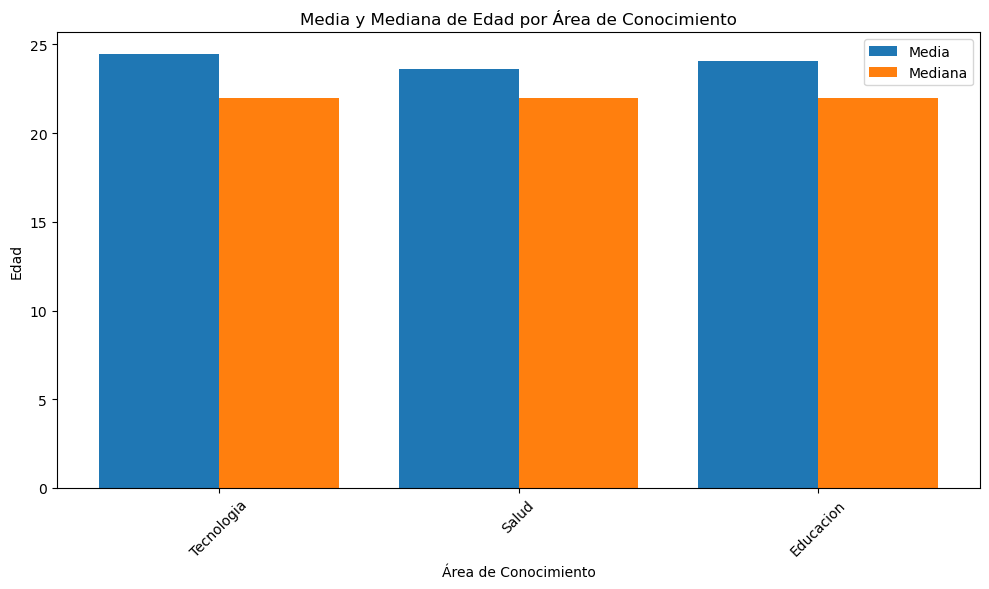

In [9]:
# Plot media y mediana
plt.figure(figsize=(10, 6))
x = range(len(top_3_areas))
plt.bar(x, mean_ages, width=0.4, label='Media', align='center')
plt.bar([i + 0.4 for i in x], median_ages, width=0.4, label='Mediana', align='center')
plt.xticks([i + 0.2 for i in x], top_3_areas, rotation=45)
plt.xlabel('Área de Conocimiento')
plt.ylabel('Edad')
plt.title('Media y Mediana de Edad por Área de Conocimiento')
plt.legend()
plt.tight_layout()
plt.show()